## Create Model VGG16

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Gray scale image of size 224 X 224. I avoided RGB because this is just for demo purpose
_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

## Print summary and compile model

In [3]:
vgg16_model.summary()
print("################")

# compile the model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,356,392 (527.79 MB)

 Trainable params: 138,356,392 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

################


## Lets get some images 

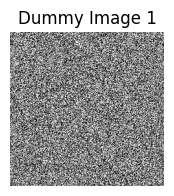

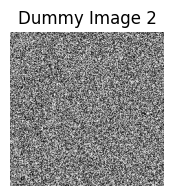

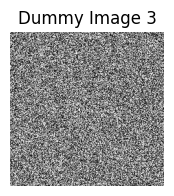

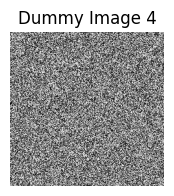

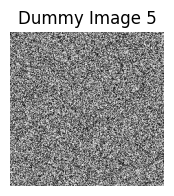

In [8]:
# lets create some dummy 224 X 224 images
import numpy as np

X_dummy = np.random.rand(10, 224, 224, 1)   # 10 random grayscale images
y_dummy = np.random.randint(0, 1000, 10)    # Random labels between 0 and 999

from tensorflow.keras.utils import to_categorical
y_dummy = to_categorical(y_dummy, num_classes=1000)


## Lets look at the dummy images
import matplotlib.pyplot as plt
# Plot the first 5 images
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.imshow(X_dummy[i].squeeze(), cmap='gray')  # squeeze to remove the extra channel dimension
    plt.title(f"Dummy Image {i+1}")
    plt.axis('off')
    plt.show()


## NOTE: You can also read images and then convert them into 224 X 224 grayscale image.

In [5]:
import tensorflow as tf
import numpy as np

# 1. Read the images
img1 = tf.keras.preprocessing.image.load_img('vgg16_mug1.jpg', color_mode='grayscale', target_size=(224,224))
img2 = tf.keras.preprocessing.image.load_img('vgg16_mug2.jpg', color_mode='grayscale', target_size=(224,224))

# 2. convert images into numpy arrays for model training
img1_array = tf.keras.preprocessing.image.img_to_array(img1)
img2_array = tf.keras.preprocessing.image.img_to_array(img2)

# 3. Stack images together like a batch
X_real = np.stack([img1_array, img2_array], axis=0) # Now, X_real.shape will be (2, 224, 224, 1)

#  4. Normalize pixel values (important!): Always normalize pixel values between 0 and 1:
X_real = X_real / 255.0


# 5. Prepare dummy labels
# Since you have only 2 images, you can just create 2 labels:
y_real = np.array([0, 1])   # For example, 2 classes: class 0 and class 1

from tensorflow.keras.utils import to_categorical
y_real = to_categorical(y_real, num_classes=1000) # y_real.shape will be (2, 1000) — same as our model output!

# compile and Train the model
# vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# vgg16_model.fit(X_real, y_real, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 6.9078
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.2585
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 6.7483
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 4.8617
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 162.5377


## Model training

In [5]:
# train the model. Run for 1-2 epochs for demo because VGG16 is very heavy.
vgg16_model.fit(X_dummy, y_dummy, epochs=2, batch_size=2)

Epoch 1/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.0000e+00 - loss: 10.6019
Epoch 2/2
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2069 - loss: 6.4227


## Model evaluation

In [6]:
vgg16_model.evaluate(X_dummy, y_dummy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1000 - loss: 6.1537


[6.153684616088867, 0.10000000149011612]

## save the model and then load the model

In [ ]:
# Save the entire model
vgg16_model.save('vgg16_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('vgg16_model.h5')